In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation
from scipy.signal import savgol_filter #Smooth

In [2]:
def fig_pre_def(figsize_x=8, figsize_y=6,fontsize=18):
    plt.rc('font', family='Helvetica')         # 自型
    plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度
    return plt.figure(figsize=(figsize_x,figsize_y)) 
def fig_post_def(x_ma=None, x_mi=None, y_ma=None, y_mi=None, 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None):
    if x_ma or x_mi != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(x_ma))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(x_mi))    
    if y_ma or y_mi != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(y_ma))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(y_mi))
    
    ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=18)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=18)
    plt.legend(fontsize=18)

# Read the Geant4 simulation data 

0.3
88061
0.4
86702
0.5
84903
0.6
83863
0.7
82447
0.8
80459
0.9
80014
1.0
77757
1.1
77047
1.2
76034
1.3
74549
1.4
73179
1.5
72695
1.6
71177
1.7
70647
1.8
69117
1.9
68060
2.0
67746
2.1
66679
2.2
66376
2.3
65528
2.4
65068
2.5
63995
2.6
62799
2.7
61937
2.8
60819
2.9
59663
3.0
60039
3.1
58847
3.2
57979
3.3
57154
3.4
56180
3.5
55433
3.6
55260
3.7
54941
3.8
54282
3.9
54047
4.0
53500
4.1
53035
4.2
52196
4.3
51684
4.4
51656
4.5
51246
4.6
51095
4.7
50465
4.8
49850
4.9
49890
5.0
49656
5.1
48910
5.2
48961
5.3
48234
5.4
48192
5.5
47528
5.6
46863
5.7
46592
5.8
46013
5.9
45883
6.0
45584
6.1
45126
6.2
45089
6.3
44420
6.4
44338
6.5
43611
6.6
43664
6.7
43020
6.8
42556
6.9
41911
7.0
41734
7.1
41826
7.2
40844
7.3
40968
7.4
40440
7.5
40020
7.6
39542
7.7
38856
7.8
38851
7.9
38354
8.0
38479
8.1
38291
8.2
38637
8.3
37490
8.4
36997
8.5
36280
8.6
36339
8.7
36101
8.8
35800
8.9
35459
9.0
35222
9.1
34663
9.2
34169
9.3
34006
9.4
34040
9.5
34000
9.6
33716
9.7
33620
9.8
33248
9.9
33271
10.0
33063
10.1
32642
10.2
325

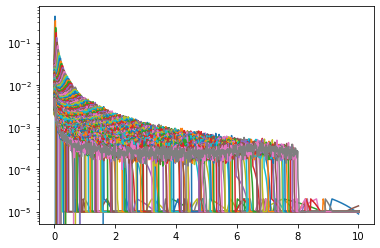

In [3]:
response_temp=[]
detected_counts = []
round_number = 2   # round the number two 0.01 unit
new_X= np.linspace(0, 10, num=1001, endpoint=True) # interpolation 
simulation_response = new_X[:,np.newaxis]
for i in np.arange(0.3,15.1,0.1):
    print(str(np.round(i,1)))
    response_temp=np.loadtxt("data/1113_EJ309_neutron_trS_response_"+str(np.round(i,1))+"MeV_Lightoutput_runtotal.txt") #Read txt file
    #
    print(len(response_temp))
    detected_counts=np.append(detected_counts,len(response_temp))
    #
    response_temp_binned_round=np.round(response_temp,round_number) #Set unit to 0.01MeVee
    response_temp_binned, response_temp_binned_counts = np.unique(response_temp_binned_round, return_counts=True) #counts the frequency
    interpolation_func = interp1d(response_temp_binned, response_temp_binned_counts ,fill_value="extrapolate") #interpolation
    res_counts=interpolation_func(new_X)
    res_counts[res_counts<0.0001]=0 # eliminate the number under zero
    simulation_response= np.column_stack((simulation_response,res_counts[:,np.newaxis]/100000))
    plt.plot(simulation_response[:,0],simulation_response[:,-1])
    plt.yscale("log")
print(simulation_response)

In [4]:
print(simulation_response.shape)

(1001, 149)


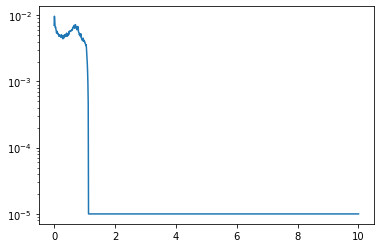

In [5]:

plt.plot(simulation_response[:,0],simulation_response[:,30])
plt.yscale("log")

In [6]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2* sigma ** 2))

def ER_function_improve(x,LO,A,a,b,c):
    Gaussian_distribution = np.zeros(len(x))
    for LO_i, A_i in zip(LO,A):
        delta_E = ((a**2)*(LO_i**2)+((b**2)*LO_i)+c**2)**0.5
        sigma_ER = delta_E/2.355
        Gaussian_distribution_temp = gaussian(x,1,LO_i,sigma_ER)
        G_sum =sum(Gaussian_distribution_temp)
        if G_sum <= 1:
            G_sum =1
        Gaussian_distribution      += A_i*Gaussian_distribution_temp/G_sum
    return Gaussian_distribution

In [7]:
# energy reslution function parameters
ER_parameters_publication = [0.113, 0.065, 0.06]
#ER_parameters_fitting = np.loadtxt('../../Lightoutput_calibration/output/20220208_ER_calibration.txt')[0:3]
#print(ER_parameters_fitting)

In [8]:
E_i =np.arange(0.1,10,0.1)
ER = (1/E_i)*((ER_parameters_publication[0]*E_i)**2+(ER_parameters_publication[1]**2)*E_i+ER_parameters_publication[2]**2 )**0.5
ER_delta_E = ((ER_parameters_publication[0]*E_i)**2+(ER_parameters_publication[1]**2)*E_i+ER_parameters_publication[2]**2 )**0.5
ER_sigma = ER_delta_E/2.355

GEB_FWHM = ER_parameters_publication[0]+ER_parameters_publication[1]*((E_i+ER_parameters_publication[2]*E_i**2)**0.5)
#GEB_FWHM = (1/E_i)*ER_parameters_publication[0]+ER_parameters_publication[1]*((E_i+ER_parameters_publication[2]*E_i**2)**0.5)
GEB_sigma = GEB_FWHM/2.355


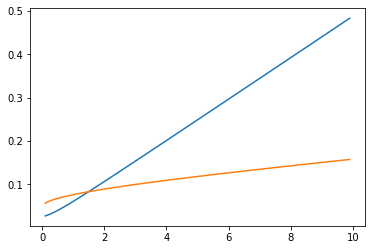

In [9]:
plt.plot(E_i,ER_sigma)
plt.plot(E_i,GEB_sigma)

(0.0, 0.45)

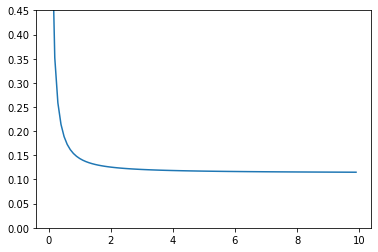

In [10]:
plt.plot(E_i,ER)
#plt.plot(E_i,GEB_FWHM)
plt.ylim(0,0.45)

<Figure size 576x432 with 0 Axes>

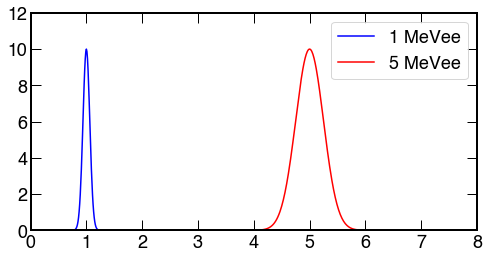

In [11]:
fig_pre_def()
fig = plt.figure(figsize=(8,4))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

a=ER_parameters_publication[0]
b=ER_parameters_publication[1]
c=ER_parameters_publication[2]

E_1 =1
delta_E = (a**2*E_1**2+((b**2)*E_1)+c**2)**0.5
sigma_ER = delta_E/2.355
ER_output_1 = gaussian(simulation_response[:,0],10,E_1,sigma_ER)
plt.plot(simulation_response[:,0],ER_output_1,'b',label='1 MeVee')

E_2 =5
delta_E = (a**2*E_2**2+((b**2)*E_2)+c**2)**0.5
sigma_ER = delta_E/2.355
ER_output_2 = gaussian(simulation_response[:,0],10,E_2,sigma_ER)

plt.plot(simulation_response[:,0],ER_output_2,'r',label='5 MeVee')

fig_post_def(xlim=(0,8),ylim=(0,12))

<Figure size 576x432 with 0 Axes>

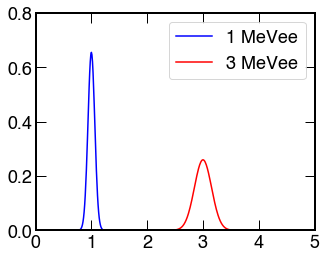

In [12]:
fig_pre_def()
fig = plt.figure(figsize=(5,4))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

a=ER_parameters_publication[0]
b=ER_parameters_publication[1]
c=ER_parameters_publication[2]

E_1 =1
delta_E = (a**2*E_1**2+((b**2)*E_1)+c**2)**0.5
sigma_ER = delta_E/2.355
ER_output_1 = gaussian(simulation_response[:,0],1,E_1,sigma_ER)

plt.plot(simulation_response[:,0],10*ER_output_1/sum(ER_output_1),'b',label='1 MeVee')

E_2 =3
delta_E = (a**2*E_2**2+((b**2)*E_2)+c**2)**0.5
sigma_ER = delta_E/2.355
ER_output_2 = gaussian(simulation_response[:,0],1,E_2,sigma_ER)

plt.plot(simulation_response[:,0],10*ER_output_2/sum(ER_output_2),'r',label='3 MeVee')

fig_post_def(xlim=(0,5),ylim=(0,0.8))

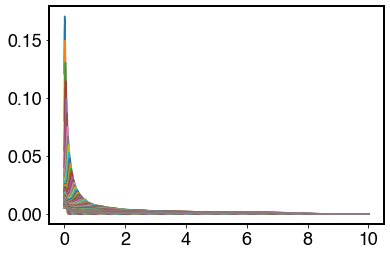

In [13]:
Neutron_response =  np.linspace(0, 10, num=1001, endpoint=True)[:,np.newaxis] # setup the lightoutput
Energy_axis      =  np.linspace(0, 10, num=1001, endpoint=True) # set the 

for i in np.arange(1,len(simulation_response[0,:]),1):
    #print(i)
    neutron_response_final=[]
    response_temp =[]
    response_temp = ER_function_improve(simulation_response[:,0],
                                        simulation_response[:,0],
                                        simulation_response[:,i],
                                        ER_parameters_publication[0],
                                        ER_parameters_publication[1],
                                        ER_parameters_publication[2])
    
    response_interpolation_func = interp1d(Energy_axis, response_temp ,fill_value="linear")
    neutron_response_final      = response_interpolation_func(Neutron_response[:,0])
    
    neutron_response_final[neutron_response_final<0] =0
    
    Neutron_response = np.column_stack((Neutron_response,(neutron_response_final/neutron_response_final.sum())[:,np.newaxis]))
    plt.plot(Neutron_response[:,0],Neutron_response[:,-1])

(0.0, 0.1)

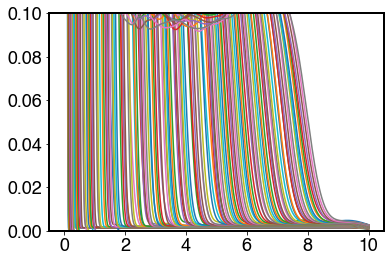

In [14]:
for i in np.arange(1,len(simulation_response[0,:]),1):
    plt.plot(Neutron_response[:,0],Neutron_response[:,i]*100)
plt.ylim(0,0.1)

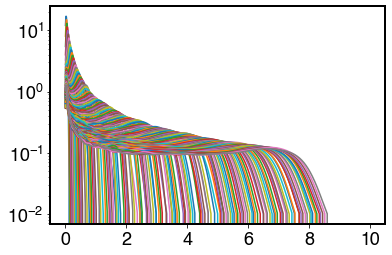

In [19]:
Neutron_response[Neutron_response<0.0001] =0
for i in np.arange(1,len(simulation_response[0,:]),1):
    plt.plot(Neutron_response[:,0],Neutron_response[:,i]*100)
    plt.yscale("log")
#plt.ylim(100,300000)
#plt.ylim(0.0001,10)

(0.0, 0.7422842936585853)

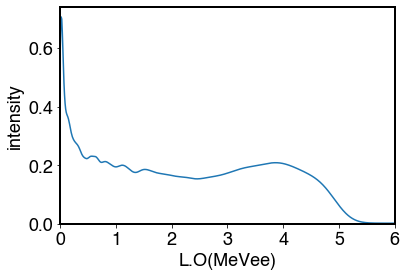

In [22]:
#plt.plot(simulation_response[:,0],simulation_response[:,30])
#no.1->0.3MeV no.11-> 1.3 no.46->4.8
energy_response = 10 # MeV
no_of_energy = int((energy_response-0.2)*10)
plt.plot(Neutron_response[:,0],Neutron_response[:,no_of_energy]*100)
#plt.yscale("log")
#plt.ylim(0.0001,1)
plt.ylabel('intensity',fontsize=18)
plt.xlabel('L.O(MeVee)',fontsize=18)
plt.xlim(0,6)
plt.ylim(0.)

<Figure size 576x432 with 0 Axes>

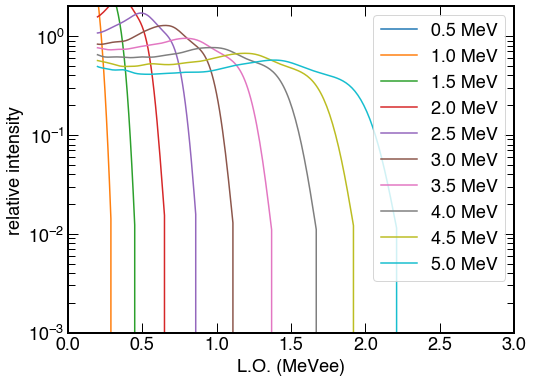

In [21]:
fig_pre_def()
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(0.5,5.5,0.5):
    no_of_energy = int((i-0.2)*10)
    plt.plot(Neutron_response[20:,0],Neutron_response[20:,no_of_energy]*100,label =str(i)+' MeV')

fig_post_def(xlim=(0,3),ylim=(0.001,2),xlabel ='L.O. (MeVee)',ylabel = 'relative intensity')

plt.yscale("log")

<Figure size 576x432 with 0 Axes>

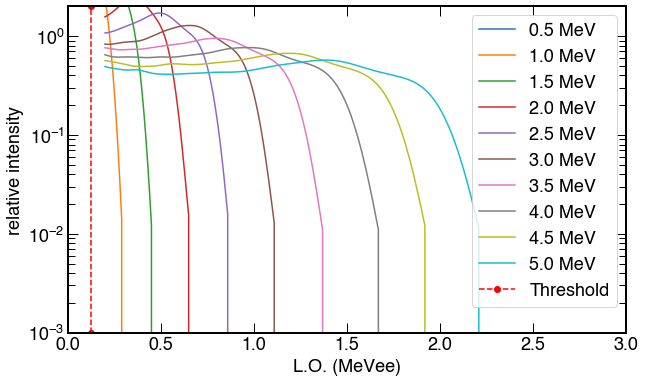

In [22]:
fig_pre_def()
fig = plt.figure(figsize=(10,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(0.5,5.5,0.5):
    no_of_energy = int((i-0.2)*10)
    plt.plot(Neutron_response[20:,0],Neutron_response[20:,no_of_energy]*100,label =str(i)+' MeV')

plt.plot([0.125, 0.125], [0.001, 2],'--r', marker = 'o',label='Threshold')
fig_post_def(xlim=(0,3),ylim=(0.001,2),xlabel ='L.O. (MeVee)',ylabel = 'relative intensity')
plt.yscale("log")

<Figure size 576x432 with 0 Axes>

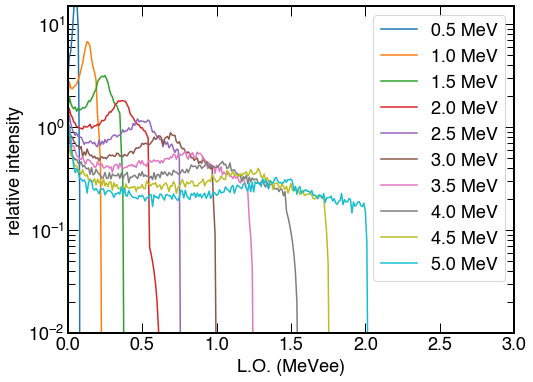

In [23]:
fig_pre_def()
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(0.5,5.5,0.5):
    no_of_energy = int((i-0.2)*10)
    plt.plot(simulation_response[0:,0],simulation_response[0:,no_of_energy]*100,label =str(i)+' MeV')

#plt.plot([0.125, 0.125], [0.001, 2],'--r', marker = 'o',label='Threshold')
fig_post_def(xlim=(0,3),ylim=(0.01,15),xlabel ='L.O. (MeVee)',ylabel = 'relative intensity')
plt.yscale("log")

# efficiency 

In [24]:
print(Neutron_response.shape)

(10001, 149)


In [25]:
Threshold_channel

NameError: name 'Threshold_channel' is not defined

In [26]:
Threshold = 0.125 # MeVee
Threshold_channel = Threshold * 1000

neutron_efficiency_threshold = []

for i in np.arange(1,len(Neutron_response[0,:]),1): #column 0 is the x-axis MeVee

    number_of_neutron_inject = detected_counts[i-1]
    simulated_neutron = 100000

    area_under_response =  sum(Neutron_response[:,i])
    area_under_response_with_threshold = sum(Neutron_response[int(Threshold_channel):,i])
    efficiency_threshold = (number_of_neutron_inject/simulated_neutron)*(area_under_response_with_threshold/area_under_response)
    print('No.',i,'Energy: ', round(i/10+0.2,1),'Number of neutron inject' ,number_of_neutron_inject,'efficiency' ,efficiency_threshold)
   
    temp = np.array((np.round(i/10+0.2,1),efficiency_threshold))

    if i==1:
        neutron_efficiency_threshold = temp.copy()
    else:
        neutron_efficiency_threshold = np.vstack((neutron_efficiency_threshold,temp))
    #neutron_efficiency_threshold = np.append(neutron_efficiency_threshold, efficiency_threshold)


No. 1 Energy:  0.3 Number of neutron inject 88061.0 efficiency 6.740970063116033e-05
No. 2 Energy:  0.4 Number of neutron inject 86702.0 efficiency 0.0006944001755858724
No. 3 Energy:  0.5 Number of neutron inject 84903.0 efficiency 0.004433990152813066
No. 4 Energy:  0.6 Number of neutron inject 83863.0 efficiency 0.020950652486413947
No. 5 Energy:  0.7 Number of neutron inject 82447.0 efficiency 0.06691085567109517
No. 6 Energy:  0.8 Number of neutron inject 80459.0 efficiency 0.15247137210398712
No. 7 Energy:  0.9 Number of neutron inject 80014.0 efficiency 0.2685641422341878
No. 8 Energy:  1.0 Number of neutron inject 77757.0 efficiency 0.35386975149413785
No. 9 Energy:  1.1 Number of neutron inject 77047.0 efficiency 0.42120825768535874
No. 10 Energy:  1.2 Number of neutron inject 76034.0 efficiency 0.46518602140541127
No. 11 Energy:  1.3 Number of neutron inject 74549.0 efficiency 0.4999697015082874
No. 12 Energy:  1.4 Number of neutron inject 73179.0 efficiency 0.508962862624612

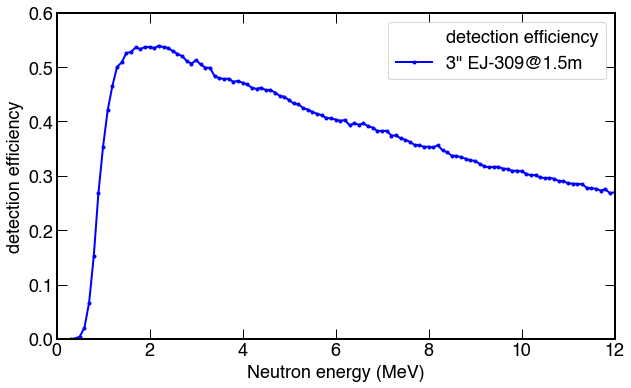

In [40]:
fig = fig_pre_def(10,6,18)
#fig = plt.figure(figsize=(10,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot([],[],' ',label = 'detection efficiency')
plt.plot(neutron_efficiency_threshold[:,0],neutron_efficiency_threshold[:,1],'.-b',linewidth=2,label='3" EJ-309@1.5m')

fig_post_def(xlim=(0,12),ylim=(0,0.6),xlabel ='Neutron energy (MeV)',ylabel = 'detection efficiency')

In [439]:
np.savetxt('output/20220211_efficiency.txt',neutron_efficiency_threshold)

In [36]:
output_pd = pd.DataFrame(Neutron_response)



path = r"output/20220301_3inches_neutron_response_function_001.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

output_pd.to_excel(writer, sheet_name = 'response_function', index=False)

writer.save()
#writer.close()

print("Finished")

Finished


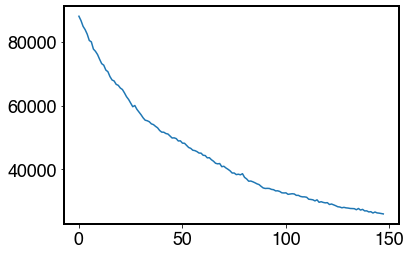

In [401]:
plt.plot(detected_counts)